In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
path = '/home/teemo/ML/data/ex2data1.txt'
data = pd.read_csv(path,header=None,names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

In [ ]:
from cProfile import label


positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
plt.show()


In [ ]:
#sigmod函数
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [ ]:
#逻辑回归代价函数
def cost(theta,x,y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(x * theta.T)))
    second = np.multiply((1-y),np.log(1 - sigmoid(x * theta.T)))
    return np.sum(first - second)/(len(x))    

In [ ]:
data.insert(0,'ones',1)

#初始化
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
theta = np.zeros(3)

#转换类型
x = np.array(x.values)
y = np.array(y.values)


In [ ]:
# 检查矩阵的维度
x.shape, theta.shape, y.shape

In [ ]:
# 用初始θ计算代价
cost(theta, x, y)

In [ ]:
# 实现梯度计算的函数（并没有更新θ）
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [ ]:
from unittest import result
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(x,y))

In [ ]:
result

In [ ]:
cost(result[0],x,y)

In [ ]:
plotting_x1 = np.linspace(30, 100, 100)
plotting_h1 = (-result[0][0]-result[0][1]*plotting_x1)/result[0][2]

fig,ax = plt.subplots(figsize=(12,8))
ax.plot(plotting_x1,plotting_h1,'y',label = 'Prediction')
ax.scatter(positive['Exam 1'],positive['Exam 2'],s=50,c='b',marker='o',label='Admitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1')
ax.set_ylabel('Exam2')
plt.show()


In [ ]:
def hex(theta,x):
    return sigmoid(x@theta.T)
hex(result[0],[1,45,85])

In [ ]:
def predict(theta,x):
    probability = sigmoid(x * theta.T)
    return [1 if x>0.5 else 0 for x in probability]


In [ ]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min,x)
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions,y)]
accuracy = (sum(map(int,correct)))/float(len(correct))*100
print ('accuracy = {0}%'.format(accuracy))

In [ ]:
#正则化逻辑回归
path = '/home/teemo/ML/data/ex2data2.txt'
data2 = pd.read_csv(path,header = None,names=['Test1','Test2','Accept'])
data2.head()

In [ ]:
positive = data2[data2['Accept'].isin([1])]
negative = data2[data2['Accept'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'],positive['Test2'],s=50,c='b',marker='o',label='Accept')
ax.scatter(negative['Test1'],negative['Test2'],s=50,c='r',marker='x',label='Reject')
ax.legend()
ax.set_xlabel('Test 1 score')
ax.set_ylabel('Test 2 score')
plt.show()

In [ ]:
#如果样本量多，逻辑回归问题很复杂，而原始特征只有x1,x2可以用多项式创建更多的特征x1、x2、x1x2、x1^2、x2^2、... X1^nX2^n。因为更多的特征进行逻辑回归时，得到的分割线可以是任意高阶函数的形状。
degree = 6
x1 = data2['Test1']
x2 = data2['Test2']
data2.insert(3,'ones',1)

for i in range(1,degree+1):
    for j in range(0,i+1):
        data2['F'+str(i-j)+str(j)] = np.power(x1,i-j) * np.power(x2,j)

data2.drop('Test1',axis=1,inplace=True)
data2.drop('Test2',axis=1,inplace=True)


data2.head()        

In [ ]:
#实现正则化的代价函数
def costReg(theta,x,y,leaning_rate):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    first = np.multiply(-y,np.log(sigmoid(x * theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(x * theta.T)))
    #theta0不计算
    reg = (leaning_rate/(2*len(x)))*np.sum(np.power(theta[:,1:theta.shape[1]],2))
    
    return np.sum(first - second)/len(x) + reg

In [ ]:
#实现正则化的梯度函数
def gradientReg(theta,x,y,learning_rate):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    paramaters = int(theta.ravel().shape[1])
    grad = np.zeros(paramaters)
    
    error = sigmoid(x * theta.T) - y
    for i in range(paramaters):
        temp = np.multiply(error,x[:,i])
        
        if i == 0 :
            grad[i] = np.sum(temp)/len(x)
        else :
            grad[i] = (np.sum(temp)/len(x)) + ((learning_rate/len(x))*theta[:,i])
    return grad
            
        
    

In [ ]:
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
Y2 = data2.iloc[:,0:1]
theta2 = np.zeros(cols - 1)

X2 = np.array(X2.values)
Y2 = np.array(Y2.values)

learning_rate = 1

In [ ]:
X2.shape,Y2.shape,theta2.shape
theta2

In [ ]:
costReg(theta2,X2,Y2,learning_rate)

In [ ]:
result2 =  opt.fmin_tnc(func = costReg,x0 = theta2,fprime=gradientReg,args = (X2,Y2,learning_rate))
result2

In [ ]:
theta_min2 = np.matrix(result2[0])
predictions2 = predict(theta_min2,X2)
correct = [1 if((a==1 and b==1) or (a == 0 and b == 0)) else 0 for (a,b) in zip(predictions2,Y2)]
accuracy = sum(map(int,correct))/len(correct)*100
print("accuracy:%.2f%% " %(accuracy))

In [ ]:
def hfun2(theta2,x1,x2):
    temp = theta2[0][0]
    place = 0
    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp += np.power(x1, i-j) * np.power(x2, j) * theta2[0][place+1]
            place+=1
    return temp

In [ ]:
def find_boundary(theta2):
    t1 = np.linspace(-1,1.5,1000)
    t2 = np.linspace(-1,1.5,1000)
    
    cordinates = [(a,b) for a in t1 for b in t2 ]
    x_cord,y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord,'x2':y_cord})
    h_val['hval'] = hfun2(theta2,h_val['x1'],h_val['x2'])
    
    decision = h_val[np.abs(h_val['hval']) < 2 * 10**-3]
    return decision.x1, decision.x2
    
           

In [ ]:
def find_decision_boundary(theta):
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    h_val = pd.DataFrame({'x1':x_cord, 'x2':y_cord})
    h_val['hval'] = hfunc2(theta, h_val['x1'], h_val['x2'])

    decision = h_val[np.abs(h_val['hval']) < 2 * 10**-3]
    return decision.x1, decision.x2

In [ ]:
#画出决策曲线
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'],positive['Test2'],s=50,c='b',marker='o',label='Accept')
ax.scatter(negative['Test1'],negative['Test2'],s=50,c='r',marker='x',label='Reject')


ax.set_xlabel('Test1')
ax.set_ylabel('Test2')
x,y = find_boundary(result2)
ax.scatter(x,y,c='y',s=10,label = 'predictions')
ax.legend()

plt.show()

In [135]:
learningRate2 = 2
result3 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, Y2, learningRate2))

  NIT   NF   F                       GTG
    0    1  6.931471805599454E-01   1.28006529E-02
    1    6  5.756386278665839E-01   4.25404594E-04
tnc: fscale = 48.4841
    2   10  5.735037680713952E-01   1.33140539E-05
    3   13  5.734022740975399E-01   4.61506037E-07
tnc: fscale = 1472.01
    4   18  5.733984876456204E-01   3.83580490E-09
    5   22  5.733984542587027E-01   1.31572455E-10
tnc: fscale = 87180.1
tnc: |fn-fn-1] = 2.59905e-09 -> convergence
    6   25  5.733984516596488E-01   3.37923249E-11
tnc: Converged (|f_n-f_(n-1)| ~= 0)


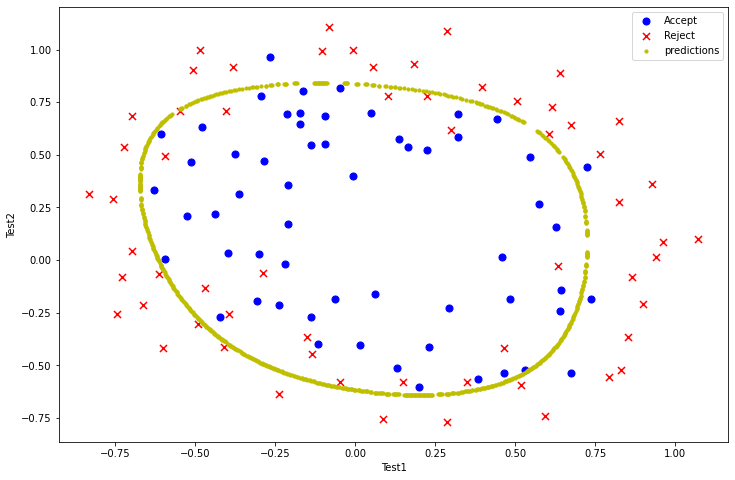

In [136]:

#画出决策曲线(lamda =0 过拟合情况 以及 =100 欠拟合情况)
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'],positive['Test2'],s=50,c='b',marker='o',label='Accept')
ax.scatter(negative['Test1'],negative['Test2'],s=50,c='r',marker='x',label='Reject')


ax.set_xlabel('Test1')
ax.set_ylabel('Test2')
x,y = find_boundary(result3)
ax.scatter(x,y,c='y',s=10,label = 'predictions')
ax.legend()

plt.show()